In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


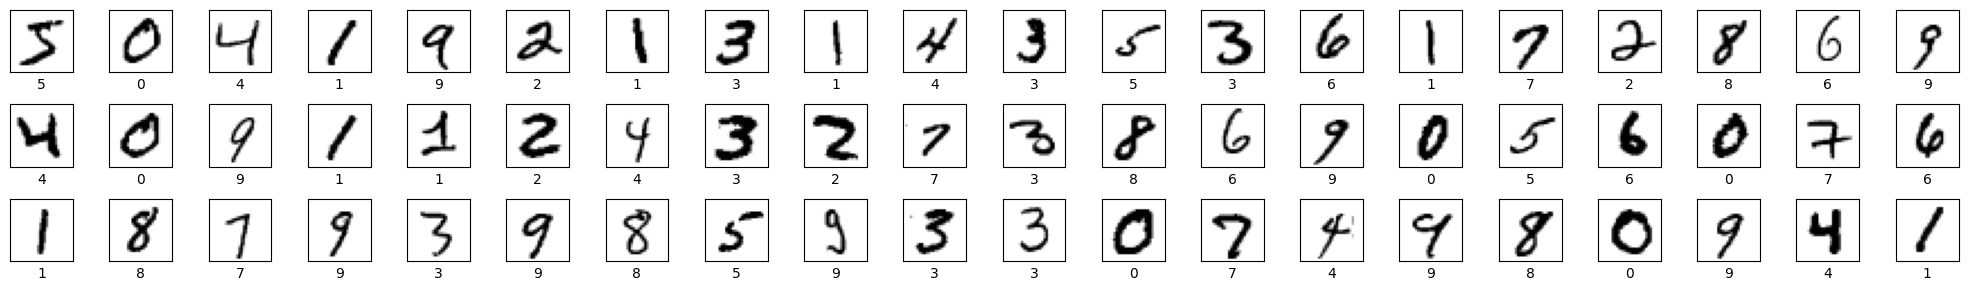

In [ ]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])

        i += 1
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [ ]:
input_shape = x_train.shape[1:]

model = keras.Sequential([
    keras.Input(shape=input_shape),

    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(10),
    layers.Activation('softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 96)        11712     
                                                                 
 activation (Activation)     (None, 18, 18, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 96)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 9, 96)         384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 9, 9, 256)         0

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 36s 19ms/step - loss: 0.2016 - accuracy: 0.9505 - val_loss: 0.0660 - val_accuracy: 0.9842
Epoch 2/10
938/938 [==============================] - 18s 19ms/step - loss: 0.0865 - accuracy: 0.9780 - val_loss: 0.0616 - val_accuracy: 0.9838
Epoch 3/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0736 - accuracy: 0.9820 - val_loss: 0.1211 - val_accuracy: 0.9687
Epoch 4/10
938/938 [==============================] - 17s 19ms/step - loss: 0.0609 - accuracy: 0.9847 - val_loss: 0.0534 - val_accuracy: 0.9879
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0567 - accuracy: 0.9856 - val_loss: 0.1246 - val_accuracy: 0.9752
Epoch 6/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0429 - accuracy: 0.9890 - val_loss: 0.0622 - val_accuracy: 0.9855
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0362 - accuracy: 0.9910 - val_loss: 0.0817 - val_accuracy:

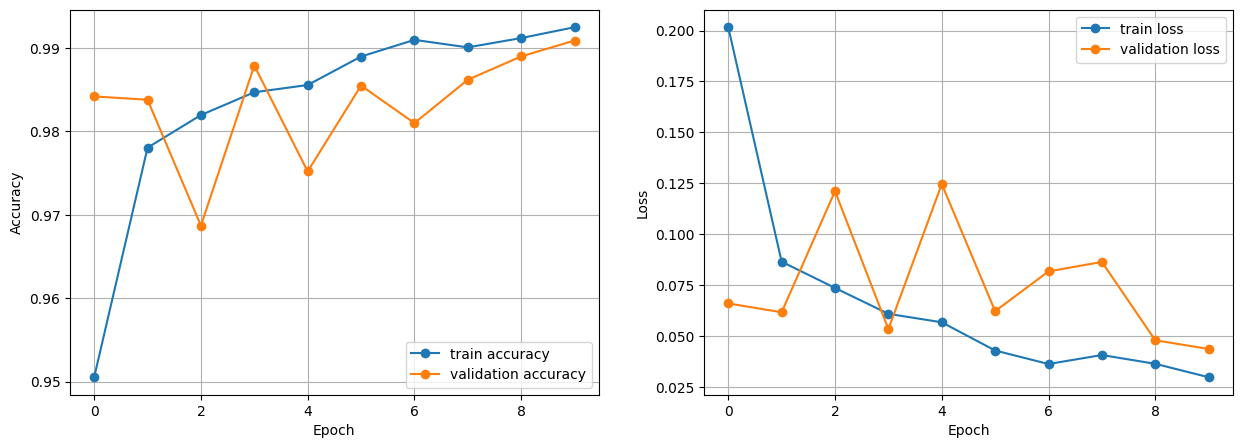

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0436 - accuracy: 0.9909

Test accuracy: 0.9908999800682068


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


4/4 [==============================] - 0s 48ms/step


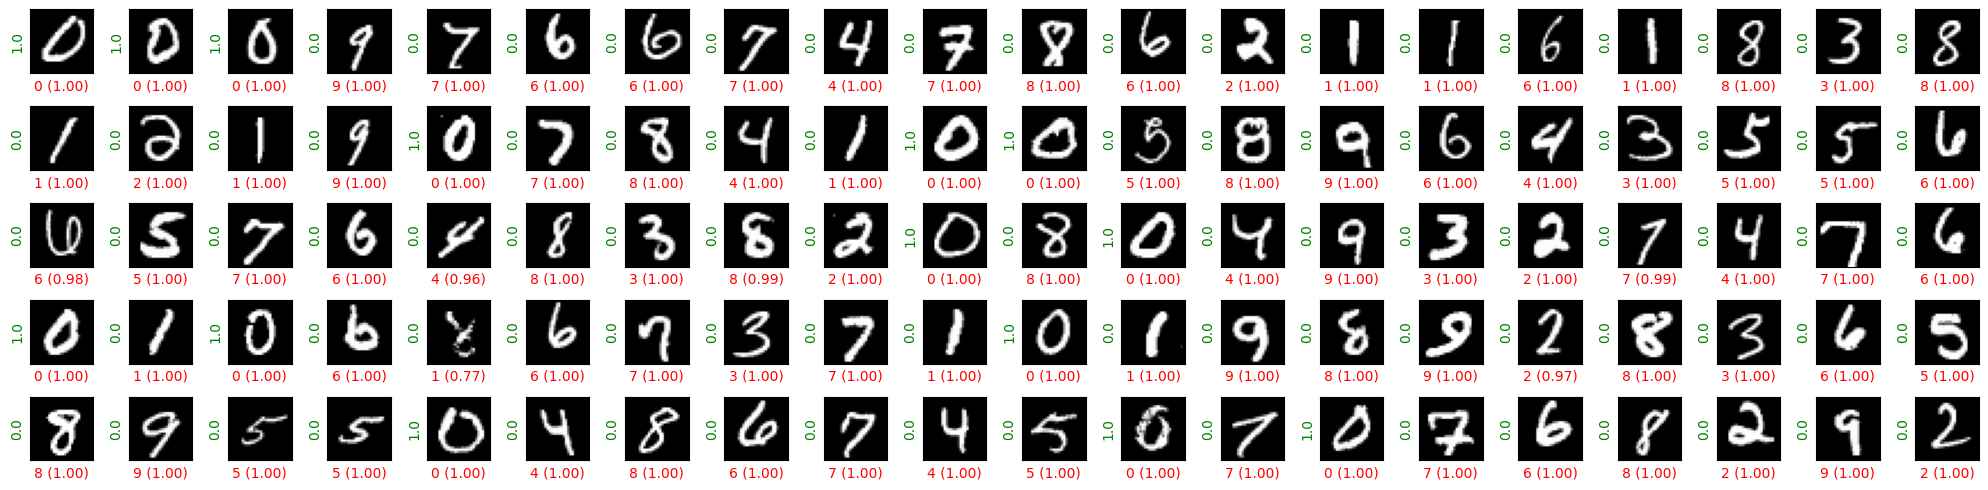

In [ ]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS * COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20, 5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i + 1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if np.array_equal(sample_labels[i], prediction):  # Use np.array_equal() for array comparison
            plt.xlabel(f"{prediction} ({confidence:.2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence:.2f})", color='r')
        plt.ylabel(sample_labels[i][0], color='g')  # Access the scalar value in sample_labels[i]
        i += 1

plt.tight_layout()
plt.show()